<h1 style="color: orange;
    text-align: center;
    font-weight: bold;
    font-size: 35px;">基于Python、MySQL和Tableau的美妆用户行为分析</h1>

<h2 style=" color: blue;
    font-style: italic;
    font-size: 26px;
">说明</h2>

<p style="   color: black;
    font-size: 22px;
">
        本次数据分析基于阿里云天池数据集(美妆用户行为数据集)，为深入了解顾客行为和偏好以此来提升商</p>
    <p style="   color: black;
    font-size: 22px;
">家的GMV，从用户和商品两个角度进行数据分析，包括转化率、PV、UV、复购率等常见电商分析指</p>
    <p style="   color: black;
    font-size: 22px;
">标。分析过程中使用Python进行数据的清洗，清洗后的数据导入MySQL数据库，运用Datagrip进行数
     <p style="   color: black;
    font-size: 22px;
">据提取，使用Tableau进行数据可视化。</p>
</p>

<h3 style="color: purple;
    font-size: 24px;
">一、数据集</h3>

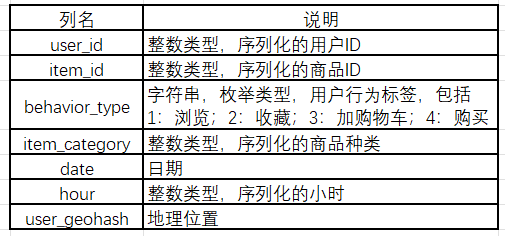

<h3 style="color: purple;
    font-size: 24px;
">二、思维导图</h3>

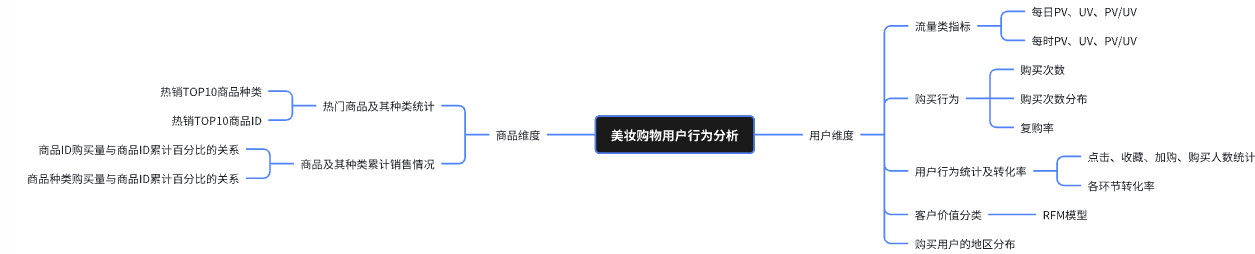

<h3 style="color: purple;
    font-size: 24px;
">三、数据清洗</h3>

<p style="   color: black;
    font-size: 16px;
">数据清洗用Python的pandas处理，效率会高很多。</p>

```python
#导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
#%%
#导入数据
data = pd.read_csv(r"E:\文件下载\美妆用户行为数据集【脱敏】.csv")
#%%
data.head()
#%%
#查询缺失值情况
data.isnull().sum()
#%%
#查看重复值
(data.duplicated()).sum()
#%%
#删除重复数据
data.drop_duplicates(inplace=True)
#%%
#更新列名
columns=['用户ID','商品ID','行为类型','商品种类','日期','时间','地理位置']
data.columns=columns
#%%
data.info()
#%%
#需要更改数据类型
data['日期']=pd.to_datetime(data['日期'])
#%%
data['日期'].max(),data['日期'].min()
#%%
data.head()

#数据清洗完成，导出到本地
data.to_csv(r"E:\下载\美妆用户行为数据_已处理.csv",index=False)
```

<h3 style="color: purple;
    font-size: 24px;
">四、数据导入Dategrip</h3>

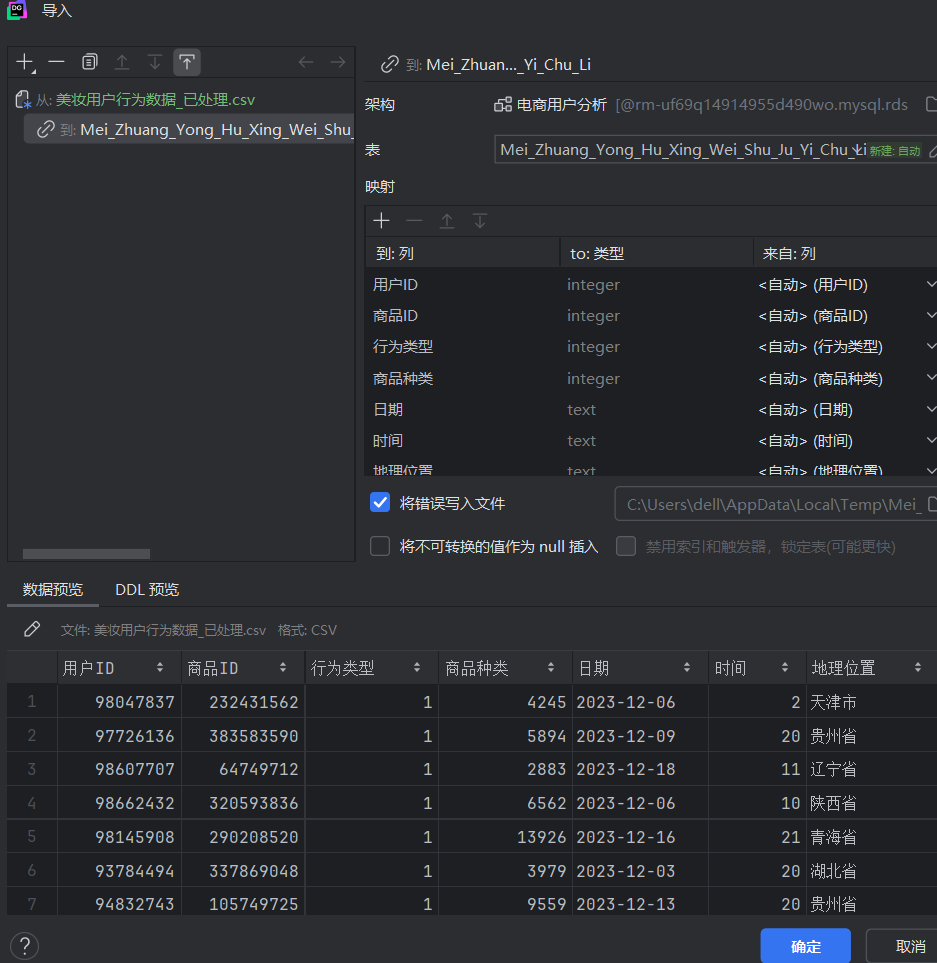

<h3 style="color: purple;
    font-size: 24px;
">五、构建模型和分析问题</h3>

<h4 style="color: black;
    font-size: 21px;
">1、用户维度</h4>

<h5 style="   color: black;
    font-size: 16px;
">（1）每日/每时PV、UV、PV/UV</h5>

```SQL
#每日
SELECT
    日期,
    COUNT(DISTINCT 用户ID) AS UV,  -- 独立访客数
    SUM(CASE WHEN 行为类型 = '1' THEN 1 ELSE 0 END) AS PV,  -- 页面访问量
    ROUND(SUM(CASE WHEN 行为类型 = '1' THEN 1 ELSE 0 END) / COUNT(DISTINCT 用户ID), 2) AS 'PV/UV' -- 平均访问量
FROM 美妆用户行为
GROUP BY
    日期
ORDER BY
    日期;
#每时
SELECT
    时间,
    COUNT(DISTINCT 用户ID) AS UV,  -- 独立访客数
    SUM(CASE WHEN 行为类型 = '1' THEN 1 ELSE 0 END) AS PV,  -- 页面访问量
    ROUND(SUM(CASE WHEN 行为类型 = '1' THEN 1 ELSE 0 END) / COUNT(DISTINCT 用户ID), 2) AS 'PV/UV' -- 平均访问量
FROM 美妆用户行为
GROUP BY
    时间
ORDER BY
    时间;
```

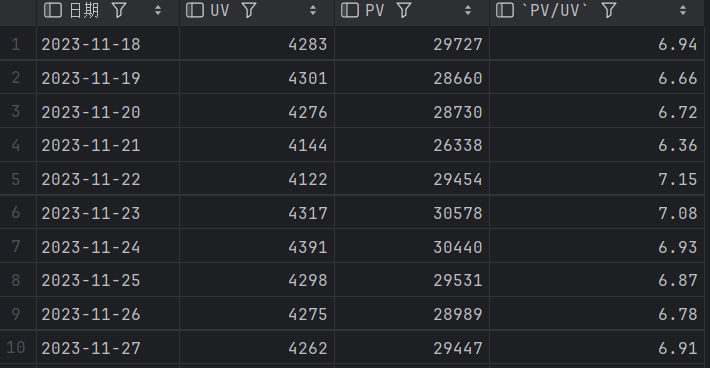

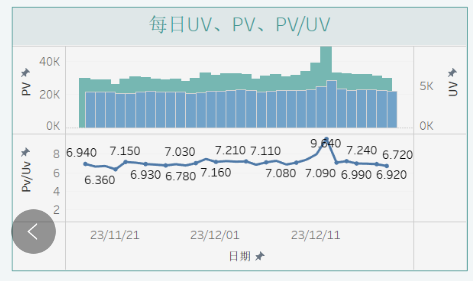

<p style="color: black;
    font-size: 18px;
">
1、情况描述：pv、pv/uv这两个指标在12月之前基本保持在一个水平，而在12月之后有小幅度增加但增加不多，12月8号之后开始大幅度增加并在12月12日当天达到顶峰，随后迅速回落，然后逐渐减少；对于uv这个指标来说，他的波动并不大，基本一直保持在一个水平，只在12月12日有较为明显的浮动。</p>

<p style="color: black;
    font-size: 18px;
">2、可能原因：12月开始部分美妆商家开始为双十二做预热，使得浏览量增加，双十二作为众所周知的节日，消费者可能会有从众心理（好像是这个名字）使得浏览量大幅度增加；但是uv波动幅度不大也说明消费者大部分都是老客户，新客户很少。</p>

<p style="color: black;
    font-size: 18px;
">3、提出建议：商家可以在商品页增加高清试色图、用户评价等并在活动页突出核心优惠（比如第二件半价），还可以和美妆博主合作以此吸引新客户，对于老客户可以采用会员机制。</p>

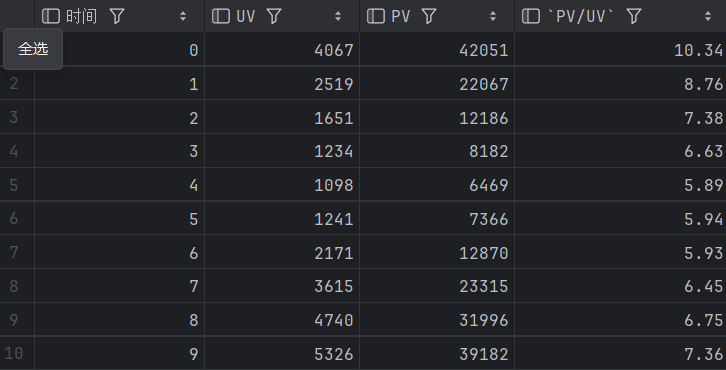

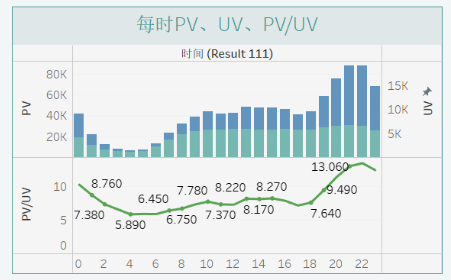

<p style="color: black;
    font-size: 18px;
">1、情况描述：凌晨1点到8点此时三个指标都很低，上午时段和下午时段，也就是9点到17点三个指标波动水平不大，在18点之后pv与pv/uv这两个指标急剧增加，并在22点达到最大值，之后迅速降低</p>

<p style="color: black;
    font-size: 18px;
">2、可能原因：凌晨1点到8点此时大部分消费者处在睡眠和起床状态，上午时段和下午时段，消费者忙于工作和学习，18点之后，消费者在结束一天忙碌的生活后且晚上容易冲动消费，导致pv、pv/uv这两个指标急剧增。</p>

<p style="color: black;
    font-size: 18px;
">3、提出建议：商家可以在晚上阶段在活动页面突出商品特点和消费优惠，以此来吸引消费者消费。</p>

<h5 style="   color: black;
    font-size: 16px;
">（2）跳失率</h5>

```SQL
#跳失率(只有点击行为的用户/总用户数)：
SELECT
CONCAT(ROUND(只有点击行为的用户/访客数UV*100,2),'%') AS 跳失率
#总用户数
FROM  (
       SELECT
        COUNT(DISTINCT 用户ID) AS '访客数UV'
       FROM 美妆用户行为
       ) PP,
#只有点击行为的用户
        (SELECT COUNT(DISTINCT 用户ID) AS 只有点击行为的用户
         FROM 美妆用户行为
         WHERE 用户ID NOT IN (SELECT DISTINCT 用户ID
                              FROM 美妆用户行为
                              WHERE 行为类型 = '2')
           AND 用户ID NOT IN (SELECT DISTINCT 用户ID
                              FROM 美妆用户行为
                              WHERE 行为类型 = '3')
           AND 用户ID NOT IN (SELECT DISTINCT 用户ID
                              FROM 美妆用户行为
                              WHERE 行为类型 = '4')) DD
```


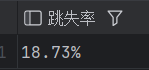

<h5 style=" color: black;
    font-size: 16px;
">（3）用户购物情况</h5>

```SQL
-- 用户的购物情况
CREATE VIEW 用户行为 AS
SELECT 用户ID,COUNT(行为类型),
       SUM(CASE WHEN 行为类型 = '1' THEN 1 ELSE 0 END) AS 点击次数,
       SUM(CASE WHEN 行为类型 = '2' THEN 1 ELSE 0 END) AS 收藏次数,
       SUM(CASE WHEN 行为类型 = '3' THEN 1 ELSE 0 END) AS 加购数,
       SUM(CASE WHEN 行为类型 = '4' THEN 1 ELSE 0 END) AS 购买数
FROM 美妆用户行为
GROUP BY 用户ID
ORDER BY  COUNT(行为类型) DESC;
-- 查看用户购物情况
SELECT *
FROM 用户购物行为情况;
```

部分结果：
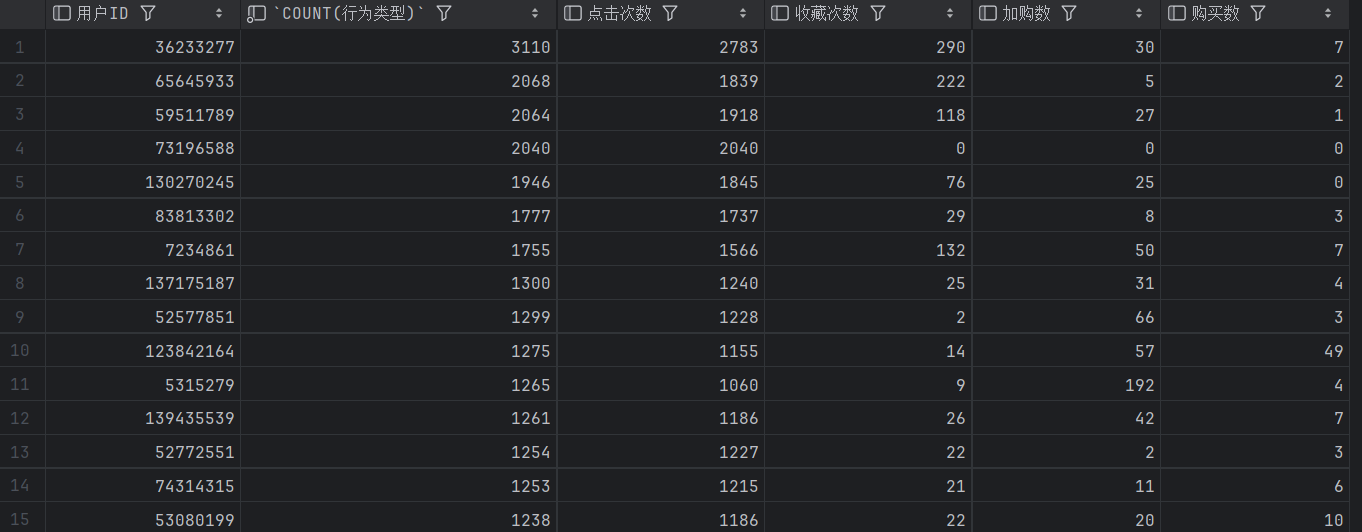

<h5 style="   color: black;
    font-size: 16px;
">（4）购买次数分布</h5>

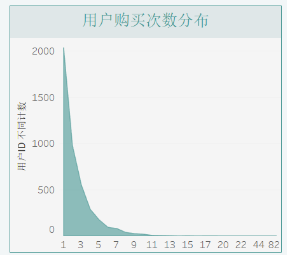

<p style="color: black;
    font-size: 18px;
">1、情况描述：绝大多数消费者购买次数为1次或2次，有很少部分会购买三次以上。</p>

<p style="color: black;
    font-size: 18px;
">2、原因：可能是由于商品价格不符合消费者的心理预期、消费者的需求量不大、以及需求不高。</p>

<p style="color: black;
    font-size: 18px;
">3、措施：刺激消费，可以用AB测试，设计两个优惠方案，发放消费券。</p>

<h5 style="   color: black;
    font-size: 16px;
">（5）复购率</h5>

```SQL
SELECT
    SUM(CASE WHEN 购买数 > 1 THEN 1 ELSE 0 END) AS 购买数大于1次,
    SUM(CASE WHEN 购买数 > 0 THEN 1 ELSE 0 END) AS 总购买数,
    CONCAT(ROUND(SUM(CASE WHEN 购买数 >1 THEN 1 ELSE 0 END)/SUM(CASE WHEN 购买数 > 0 THEN 1 ELSE 0 END)*100,2),'%') AS 复购率
FROM 用户行为
```

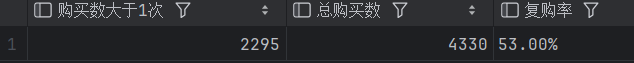

<h5 style="   color: black;
    font-size: 16px;
">（6）用户行为转化漏斗</h5>

<p style="color: black;
    font-size: 18px;
">在购物环节中收藏和加入购物车两个环节没有先后之分，所以将这两个环节放在一起作为购物环节的一步。最终得到用户购物行为各环节转化率，如下：</p>

<h5 style="   color: black;
    font-size: 16px;
">①用户购物行为统计</h5>

```SQL
SELECT
    SUM(点击次数) AS 点击次数,
    SUM(收藏次数) AS 收藏次数,
    SUM(加购数) AS 加购数,
    SUM(购买数) AS 购买数
FROM 用户行为
```

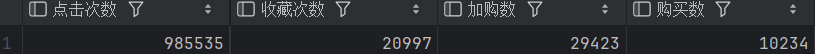

<h5 style="   color: black;
    font-size: 16px;
">②用户购买行为转化率</h5>

```SQL
SELECT
    CONCAT(ROUND(SUM(点击次数)/SUM(点击次数)*100,2),'%') AS Pv,
    CONCAT(ROUND((SUM(收藏次数)+SUM(加购数))/SUM(点击次数)*100,2),'%') AS Pv_To_Favcart,
    CONCAT(ROUND(SUM(购买数)/SUM(点击次数)*100,2),'%') AS Pv_To_Buy,
    CONCAT(ROUND(SUM(购买数)/(SUM(收藏次数)+SUM(加购数))*100,2),'%') AS Favcart_To_Buy
FROM 用户行为
```

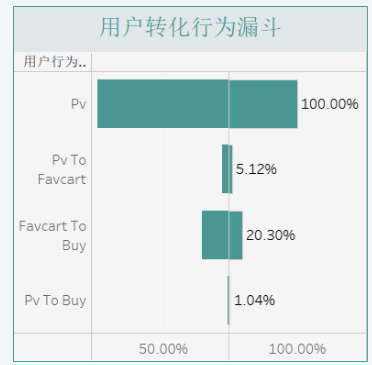

<p style="color: black;
    font-size: 18px;
">这个转化率需要跟行业或者竞争对手的数据进行对比分析，也可以根据自己店铺的历史数据，或者不同商品进行对比，当出现异常时，回溯流程进而发现问题。</p>

<h4 style="color: black;
    font-size: 21px;
">（7）基于RFM模型找出有价值的用户</h4>

<p style="   color: black;
    font-size: 18px;
">
这里利用RFM模型去分析用户价值，以便针对不同用户采取不同措施。RFM模型的概念如下：</p>
<p style="   color: black;
    font-size: 18px;
">R（Recency）：客户最近一次交易时间的间隔。R值越大，表示客户交易发生的日期越久，反之则表示客户交易发生的日期越近。</p>

<p style="   color: black;
    font-size: 18px;
">F（Frequency）：客户在最近一段时间内交易的次数。F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。</p>
    
<p style="   color: black;
    font-size: 18px;
">M（Monetary）：客户在最近一段时间内交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。</p>
    
<p style="   color: black;
    font-size: 18px;
">由于数据源没有相关的金额数据，暂且通过R和F的数据对客户价值进行打分。</p>

<h5 style="color: black;
    font-size: 16px;
">① 计算R-Recency</h5>

<p style="   color: black;
    font-size: 18px;
">由于数据集包含的时间是从2023-11-18至2023-12-18，这里选取2023-12-19作为计算日期，统计客户最近发生购买行为的日期距离2023-12-18间隔几天，再对间隔时间进行排名，间隔天数越少，客户价值越大，排名越靠前。</p>

```SQL
SELECT
    用户ID,
    R_Recency,
    RANK() OVER (ORDER BY R_Recency ASC) AS Recent_Rank
FROM (
         SELECT
             用户ID,
             DATEDIFF('2023-12-19', MAX(日期)) AS R_Recency
         FROM 美妆用户行为
         WHERE 行为类型 = '4'  -- 只统计购买行为
         GROUP BY 用户ID
         ORDER BY R_Recency ASC-- 升序排列，R值越小表示越活跃
     ) AS a
```


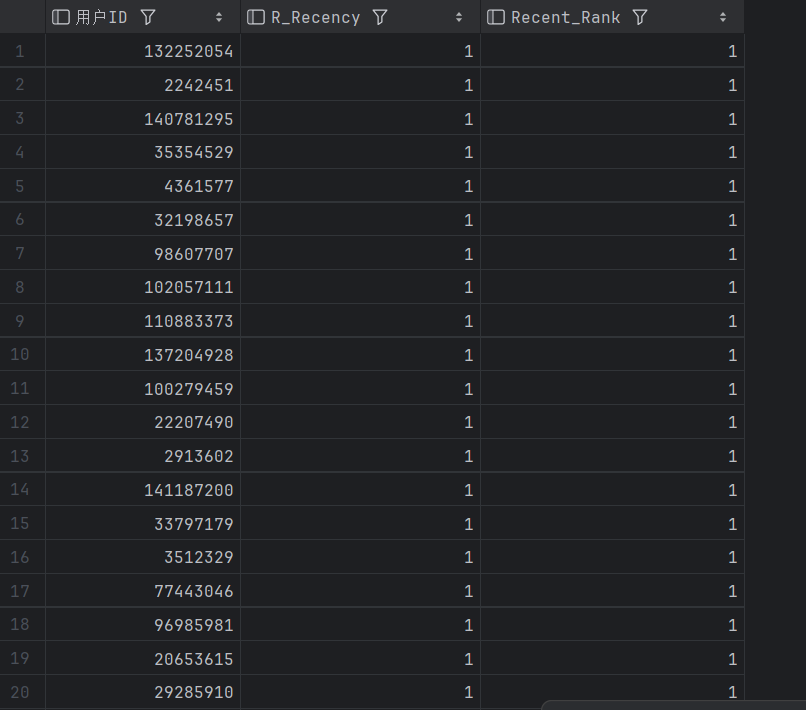

<h5 style="   color: black;
    font-size: 16px;
">② 计算F-Frequency</h5>

<p style="   color: black;
    font-size: 18px;
">先统计每位用户的购买频率，再对购买频率进行排名，频率越大，客户价值越大，排名越靠前。</p>

```SQL
SELECT
    用户ID,
    F_Frequency,
    RANK() OVER (ORDER BY F_Frequency DESC) AS Frequency_Rank
FROM (
         SELECT
             用户ID,
             COUNT(行为类型) AS F_Frequency
         FROM 美妆用户行为
         WHERE 行为类型 = '4'
         GROUP BY 用户ID
         ORDER BY F_Frequency DESC
     ) AS b
```

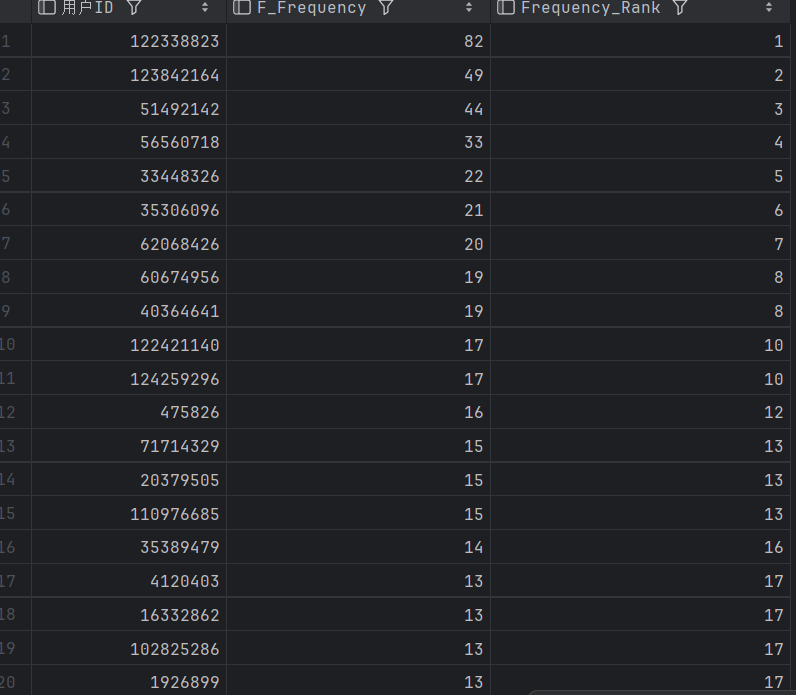

<h5 style="   color: black;
    font-size: 16px;
">③ 对用户进行分类</h5>

```SQL
WITH
-- 计算R-Recency排名
recency_ranking AS (
    SELECT
        用户ID,
        R_Recency,
        RANK() OVER (ORDER BY R_Recency ASC) AS Recent_Rank
    FROM (
             SELECT
                 用户ID,
                 DATEDIFF('2023-12-19', MAX(日期)) AS R_Recency
             FROM 美妆用户行为
             WHERE 行为类型 = '4'  -- 只统计购买行为
             GROUP BY 用户ID
             ORDER BY R_Recency ASC-- 升序排列，R值越小表示越活跃
         ) AS a
),

-- 计算F-Frequency排名
frequency_ranking AS (
    SELECT
        用户ID,
        F_Frequency,
        RANK() OVER (ORDER BY F_Frequency DESC) AS Frequency_Rank  -- 注意：频率排名按降序（值越高排名越前）
    FROM (
             SELECT
                 用户ID,
                 COUNT(行为类型) AS F_Frequency
             FROM 美妆用户行为
             WHERE 行为类型 = '4'
             GROUP BY 用户ID
             ORDER BY F_Frequency DESC
         ) AS b
),

-- 计算总客户数，用于确定中位数
total_customers AS (
    SELECT COUNT(DISTINCT 用户ID) AS total
    FROM 美妆用户行为
    WHERE 行为类型 = '4'
)

-- 组合排名并分类客户
SELECT
    r.用户ID,
    r.R_Recency,
    f.F_Frequency,
    r.Recent_Rank,
    f.Frequency_Rank,
    CASE
        WHEN r.Recent_Rank <= t.total/2 AND f.Frequency_Rank <= t.total/2 THEN '有价值的客户'  -- 高R高F
        WHEN r.Recent_Rank <= t.total/2 AND f.Frequency_Rank > t.total/2 THEN '发展客户'      -- 高R低F
        WHEN r.Recent_Rank > t.total/2 AND f.Frequency_Rank <= t.total/2 THEN '保持客户'      -- 低R高F
        ELSE '挽留客户'                                              -- 低R低F
        END AS 客户分类
FROM recency_ranking r
         JOIN frequency_ranking f ON r.用户ID = f.用户ID
         CROSS JOIN total_customers t
ORDER BY 客户分类 DESC, r.Recent_Rank ASC, f.Frequency_Rank ASC
```

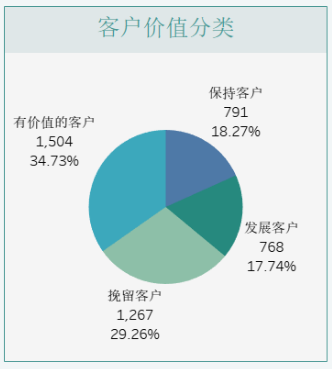

<p style="   color: black;
    font-size: 18px;
">1、针对重要客户（近期有付费且经常付费）有价值的用户，他们可能不需要额外的刺激消费，可以关注其售后体验等，提升用户的消费满意度；</p>

<p style="   color: black;
    font-size: 18px;
">2、针对保持客户（经常付费但是已经在很久之前了），曾经的忠实用户面临流失的风险，对其可以进行适当的提醒，如消息推送，还可以了解其离开的原因，以采取相应措施。</p>

<p style="   color: black;
    font-size: 18px;
">3、针对发展客户（近期有付费但是次数很少，或者只有一次付费），即新用户或者黏性较低的用户，我们的目标是刺激他们消费，可以通过开展促销活动等措施。</p>
    
<p style="   color: black;
    font-size: 18px;
">4、针对挽留客户（很少付费而且在很久之前），即流失用户，需要挽回并刺激其消费。从另一方面来看，可以尝试寻找用户流失的原因，通过反馈来调整我们的产品。</p>

<h5 style="   color: black;
    font-size: 16px;
">（8）购买人群地图分布</h5>

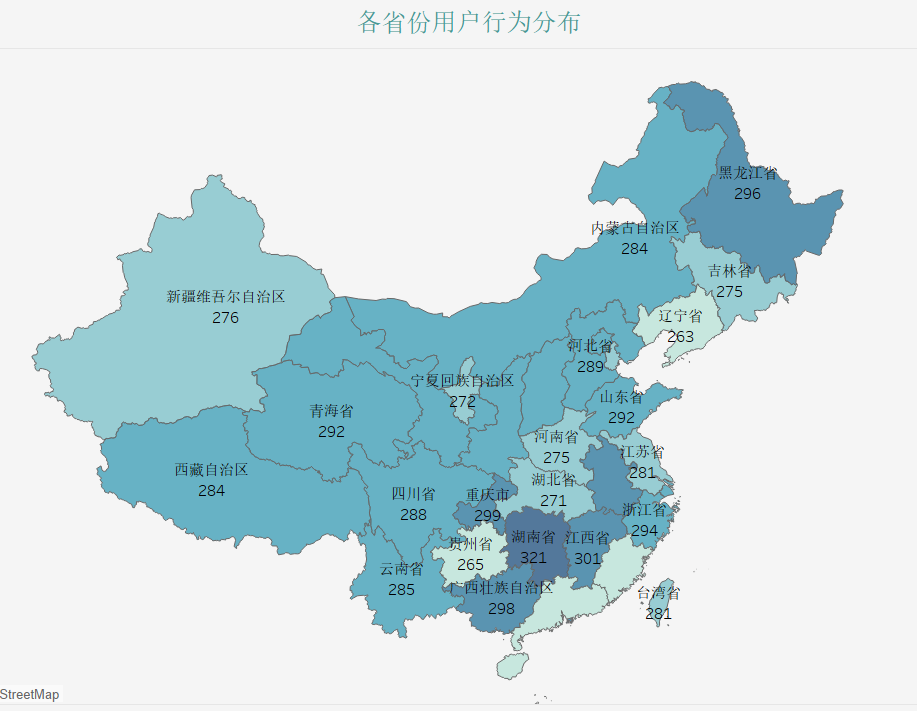

<p style="   color: black;
    font-size: 18px;
">1、总体上来看各地区购买数量差异并不是很大，相对于东部地区，西北地区购买数量不少可能是在防晒和修复类产品需求突出，而北部地区（比如北京、山西、黑龙江等）在冬季由于气候干燥，保湿、滋润类的产品需求要大一些。我确实没想到广州和福建的购买量是最少的，可能是由于美妆产地在那里多一些，大家也许比较喜欢线下购买。（这里的分析可能带有地区的刻板印象，如果要找出具体的原因，需要更多的具体购买产品的名称和类型来探讨）</p>

<p style="   color: black;
    font-size: 18px;
">2、针对各个地区商家可以采取不同的销售策略，比如对于北方的消费者可以推出保湿套装，以及对于偏远地区可以有包邮优惠或者满多少包邮；与本地的美妆博主合作来带动消费</p>

<h4 style="color: black;
    font-size: 21px;
">2、商品维度</h4>

<h5 style="   color: black;
    font-size: 16px;
">（1）热门商品及其种类统计</h5>

```SQL
SELECT
    商品ID,#商品种类
    COUNT(用户ID) AS 商品购买量
FROM
    美妆用户行为
WHERE
    行为类型=‘4’
GROUP BY
    商品ID
ORDER BY
    商品购买量 DESC
```

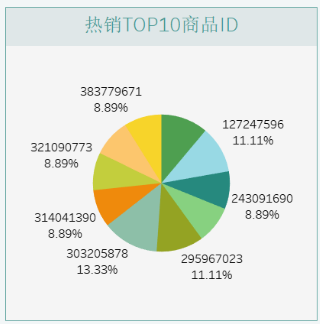

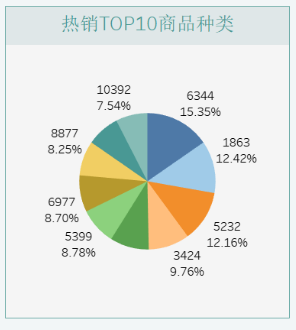

<h5 style="   color: black;
    font-size: 16px;
">（2）商品及其种类累计销售情况</h5>

-- 计算不同购买次数下的商品种类（商品ID）数

```SQL
WITH product_purchase_count AS (
    SELECT
        商品种类,#商品ID
        COUNT(1) AS purchase_count
    FROM
        美妆用户行为
    WHERE
        行为类型 = 4
    GROUP BY
        商品种类 #商品ID
    ORDER BY
        purchase_count
)
-- 计算总购买数量
   , total_purchase_count AS (
    SELECT
        COUNT(1) AS total_count
    FROM
        美妆用户行为
    WHERE
        行为类型 = 4
)
-- 计算累计百分比
SELECT
    ppc.商品种类,#商品ID
    ppc.purchase_count,
    tpc.total_count,
    ROUND(SUM(ppc.purchase_count) OVER (ORDER BY ppc.purchase_count ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) / tpc.total_count, 4) AS 商品种类累计百分比 #商品ID
FROM
    product_purchase_count ppc,
    total_purchase_count tpc;
```

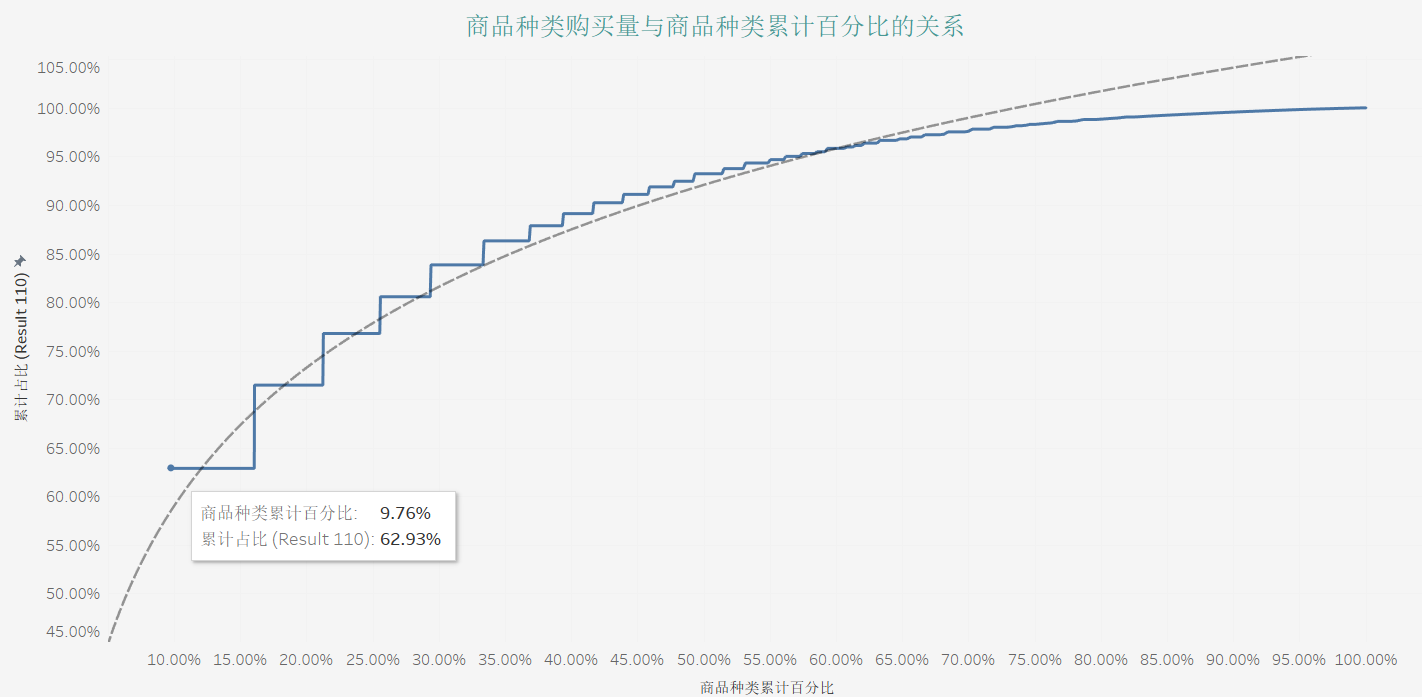

<p style="color: black;
    font-size: 18px;
">从上表可以更清楚的看出9.76%的商品种类贡献了62.93%的销售量不符合传统零售业的二八法则，同样可以说明
其依靠长尾理论累计销售</p>

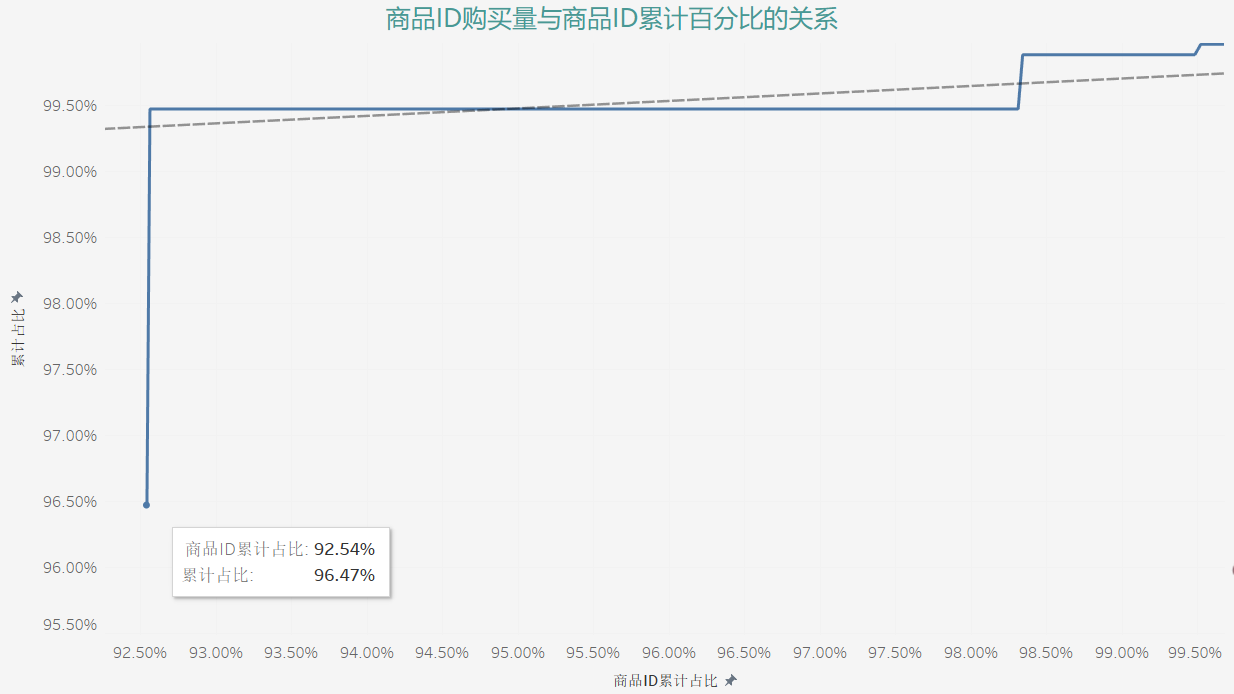

<p style="color: black;
    font-size: 18px;
">从上图可以看出92.54%%的商品ID贡献了96.47%的销售量，不符合传统零售业的二
八法则，说明电商靠长尾理论累计销售，而不是制造爆款商品带动销量。
</p>

<h3 style="color: purple;
    font-size: 24px;
">六、仪表盘的搭建</h3>

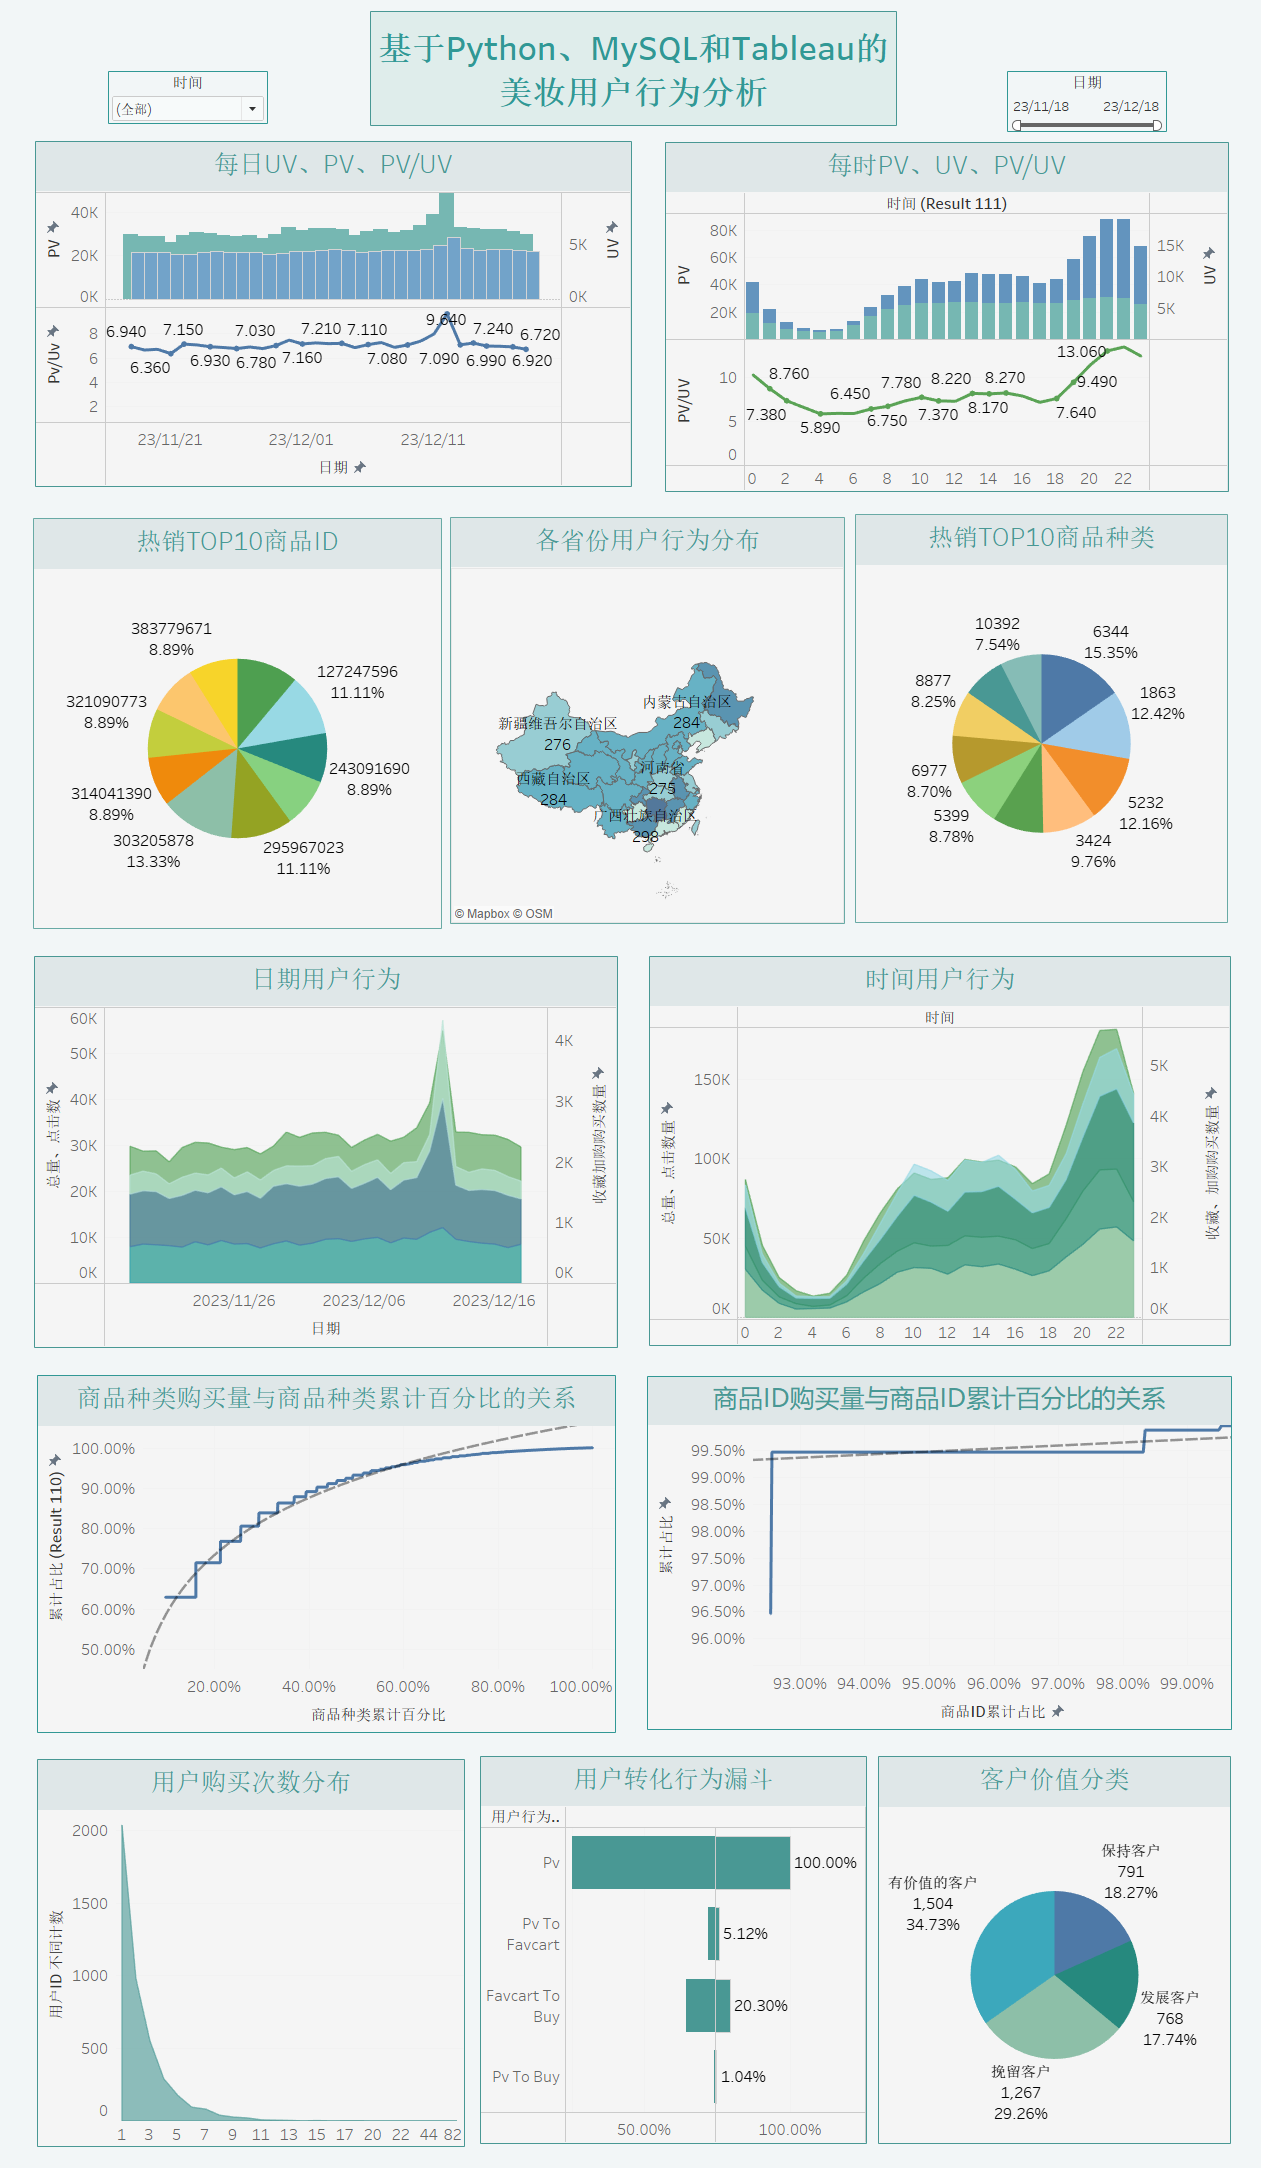

<h3 style="color: purple;
    font-size: 24px;
">七、总结</h3>

<p style="   color: black;
    font-size: 18px;
">1、总体转化率只有1.04%，用户点击后收藏、加购物车的转化率为5.12%，需要提高用户的购买意愿，可通过活动促销、精准营销、简化购买流程等方式提升顾客信任度。</p>

<p style="   color: black;
    font-size: 18px;
">2、流量类指标发现除双十二当天，其他时间的pv、uv、pv/uv波动不大，且消费者大部分都是老客户，商家可将重心放在吸引新客户，且18点与22点为用户活跃高峰，商家可以在此阶段做促销活动以此接触更多的活跃用户，活动效果较好。</p>

<p style="   color: black;
    font-size: 18px;
">3、用户购买行为发现绝大多数消费者购买次数为1次或2次，且复购率为53%，顾客忠诚度不高，商家可采取阶梯式优惠来鼓励购买。</p>

<p style="   color: black;
    font-size: 18px;
">4、通过R和F的数据对用户进行分组，然后根据商家的实际情况，进而对不同组的用户进行精准化营销，还可以通过对R和F的数据监测，推测客户消费的异动状况，挽回流失客户。</p>

<p style="   color: black;
    font-size: 18px;
">5、购买用户地区分布较为平均，商家可针对不同的地区采取不同的销售策略。</p>